In [1]:
# pip install nltk
# pip install lazypredict
# pip install seaborn
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('graphviz')
import random
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os
import re
import string
from nltk.metrics import ConfusionMatrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
import sys
from nltk import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re
import string
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk import FreqDist
import statistics
import numpy as np 
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
from lazypredict.Supervised import LazyClassifier
import os
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
import nltk
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from scipy.optimize import approx_fprime
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /home/abby/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/abby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading graphviz: Package 'graphviz' not found in
[nltk_data]     index


In [3]:
RunName = 'AllTest'
# 1 - Words, 2 - Type, 3 - BiGram Words, 4 - BiGram Type
case_Type = 1
# 1 - Boolean, 2 - Counts, 3 - Just feature set
case_BoolTF = 3

# Feachure set for report
control = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]#[1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1]




# Define the paths to the two directories
original_dir = r"./DataSet2/benchmark_set/human-written"
generated_dir = r"./DataSet2/benchmark_set/ai-generated"

# Get the files for the original
original_file_ids = [file_id for file_id in os.listdir(original_dir) if file_id.endswith(".txt")]
file_original = []
for file_id in original_file_ids:
    file_path = os.path.join(original_dir, file_id)
    #print(f"Reading original file: {file_path}")  # Print file path for debugging
    with open(file_path, 'r', encoding='utf-8') as file:
        file_original.append((file.read(), "org"))  # Tuple with text and class "org"

# Get the files for the generated
generated_file_ids = [file_id for file_id in os.listdir(generated_dir) if file_id.endswith(".txt")]
file_generated = []
for file_id in generated_file_ids:
    file_path = os.path.join(generated_dir, file_id)
    #print(f"Reading generated file: {file_path}")  # Print file path for debugging
    with open(file_path, 'r', encoding='utf-8') as file:
        file_generated.append((file.read(), "gen"))  # Tuple with text and class "gen"

# Check if there are overlapping file IDs between the two directories
if set(original_file_ids).intersection(set(generated_file_ids)):
    print("Warning: There are overlapping file IDs between original and generated data.")
else:
    print("No overlapping file IDs between original and generated data.")

# Merge the files into one string
merged_original = '{*%*}'.join([text for text, _ in file_original])
merged_generated = '{*%*}'.join([text for text, _ in file_generated])

# Combine the data from both classes
documents = file_original + file_generated
print(len(documents))
# Get as words
all_words = []
short_org_words = word_tokenize(merged_original)
short_gen_words = word_tokenize(merged_generated)

for w in short_org_words:
    all_words.append(w.lower())
for w in short_gen_words:
    all_words.append(w.lower())

print("Length of Human Data:", len(short_org_words)) # Number of words
print("Length of Generated Data:", len(short_gen_words)) # Number of words
print("All data size: ", len(all_words))    # Todal number of words
print("=====")
def clean(text, punF, numF, stopF):
    # remove numbers
    if numF == 1:
        text = re.sub(r'\d+', '', text)
    # remove punctuations
    if punF == 1:
        text = "".join([char for char in text if char not in string.punctuation]) 
    # remove stop words
    if stopF == 1:
        stop_words = set(stopwords.words('english'))
        text = [w for w in word_tokenize(text) if w.lower() not in stop_words]
        text = ' '.join(text)  # Join the list of words into a single string
    return text

# output = [clean(word,1,1,1) for word in all_words]
# print("Cleaned data size: ",len((all_words))) # Number of cleaned words

#case_Type = 1

if case_Type == 1:
    # Set up functions
    def find_features_count(document,word_features):
        words = document.split()
        features = {}
        for w in word_features:
            features[w] = words.count(w)
        return features
    
    def find_features_boolean(document,word_features):
        words = set(document)
        features = {}
        for w in word_features:
            features[w] = (w in words)
        return features

    #Clean Words
    cleaned_words = [clean(word,1,1,1) for word in all_words]
    # Pulling feachures
    if(TestingOutput == True):
        print("All data size: ", len((all_words)))
        print("Cleaned data size: ", len((cleaned_words)))
    all_fetr = cleaned_words
    print("Using Words")
    
elif case_Type == 2:
    # Set up functoins 
    def find_features_count(document,word_features):
        foo = nltk.pos_tag(word_tokenize(document))
        document = [pos_tag for (word, pos_tag) in foo]
        features = {}
        for w in word_features:
            features[w] = document.count(w)
        return features
    
    def find_features_boolean(document,word_features):
        foo = nltk.pos_tag(word_tokenize(document))
        document = [pos_tag for (word, pos_tag) in foo]
        words = set(document)
        features = {}
        for w in word_features:
            features[w] = (w in words)
        return features
    
    #Clean Words
    cleaned_words = [clean(word,1,1,1) for word in all_words]
    # Pulling feachures
    if(TestingOutput == True):
        print("All data size: ", len((all_words)))
        print("Cleaned data size: ", len((cleaned_words)))
    all_fetr = nltk.pos_tag(cleaned_words)
    all_fetr = [pos_tag for (word, pos_tag) in all_fetr]
    print("Using Word's Type")

elif case_Type == 3:
    # Function to generate n-grams
    def find_features_count(document,word_features):
        foo = word_tokenize(document[:])
        document = list(bigrams(foo))
        features = {}
        for w in word_features:
            features[w] = document.count(w)
        return features
    
    def find_features_boolean(document,word_features):
        foo = word_tokenize(document[:])
        document = list(bigrams(foo))
        words = set(document)
        features = {}
        for w in word_features:
            features[w] = (w in words)
        return features
    
    #Clean Words
    cleaned_words = [clean(word,0,0,0) for word in all_words]
    if(TestingOutput == True):
        print("All data size: ", len((all_words)))
        print("Cleaned data size: ", len((cleaned_words)))
    all_fetr = list(bigrams(cleaned_words[:]))
    print("Using BiGram for Word")

elif case_Type == 4:
    # Function to generate n-grams
    def find_features_count(document,word_features):
        foo = nltk.pos_tag(word_tokenize(document))
        document = [pos_tag for (word, pos_tag) in foo]
        #foo = word_tokenize(document[:])
        document = list(bigrams(document))
        features = {}
        for w in word_features:
            features[w] = document.count(w)
        return features
    
    def find_features_boolean(document,word_features):
        foo = nltk.pos_tag(word_tokenize(document))
        document = [pos_tag for (word, pos_tag) in foo]
        #foo = word_tokenize(document[:])
        document = list(bigrams(document))
        words = set(document)
        features = {}
        for w in word_features:
            features[w] = (w in words)
        return features
    
    #Clean Words
    cleaned_words = [clean(word,0,0,0) for word in all_words]
    if(TestingOutput == True):
        print("All data size: ", len((all_words)))
        print("Cleaned data size: ", len((cleaned_words)))
    all_fetr = nltk.pos_tag(cleaned_words)
    all_fetr = [pos_tag for (word, pos_tag) in all_fetr]
    all_fetr = list(bigrams(all_fetr[:]))
    print("Using BiGram for Type")
else:
    print("case_value out of bounds")
if(TestingOutput == True):
    if (case_Type < 5):
        print(all_fetr[:15])
all_fetr = nltk.FreqDist(all_fetr)

2001
Length of Human Data: 669386
Length of Generated Data: 404577
All data size:  1073963
=====
Using Words


In [7]:
def find_features_stats(document, control):
        # Set Up
        sentences = sent_tokenize(document)
        tokenizer = RegexpTokenizer(r'\w+')
        sentence_lengths = [len(tokenizer.tokenize(sentence)) for sentence in sentences]
        #sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
        paragraphs = document.split('\n\n') 
        features = {}
        #print(sentence_lengths)

        # sentences per paragraph
        if control[0] == 1:
            sent_per_paragraph = [len(sent_tokenize(paragraph)) for paragraph in paragraphs]
            mean_sent_per_paragraph = np.mean(sent_per_paragraph)
            features['Sentences per paragraph'] = mean_sent_per_paragraph

        # words per paragraph
        if control[1] == 1:
            words_per_paragraph = [len(word_tokenize(paragraph)) for paragraph in paragraphs]
            mean_words_per_paragraph = np.mean(words_per_paragraph)
            features['Words per paragraph'] = mean_words_per_paragraph

        # Number of occurrences of ')'
        if control[2] == 1:
            var = document.count(')')
            features['Number of occurrences of )'] = var

        # Number of occurrences of '-'
        if control[3] == 1:
            var = document.count('-')
            features['Number of occurrences of -'] = var

        # Number of occurrences of ';'
        if control[4] == 1:
            var = document.count(';')
            features['Number of occurrences of ;'] = var
        
        # Number of occurrences of '?'
        if control[5] == 1:
            var = document.count('?')
            features['Number of occurrences of ?'] = var
            
        # Number of occurrences of '''
        if control[6] == 1:
            var = document.count('\'')
            features['Number of occurrences of \''] = var

        # Sentence STD
        if control[7] == 1:
            std_dev = np.std(sentence_lengths) # Sample STD
            features['Sentence STD'] = std_dev

        # Length difference for consecutive sentences
        if control[8] == 1:
            length_diff = [sentence_lengths[i] - sentence_lengths[i - 1] for i in range(1, len(sentence_lengths))]
            # Add mean length difference as a feature if there is a valid denominator
            if len(length_diff) > 0:
                mean_length_diff = np.mean(length_diff)
                features['Length difference for consecutive sentences'] = mean_length_diff
            else:
                # Handle the case when there is no valid denominator (e.g., only one sentence)
                features['Length difference for consecutive sentences'] = 0.0  # Set a default value or choose an appropriate handling
        # Sentence with <11 words
        if control[9] == 1:
            # Count sentences with <11 words
            short_sentences = [sentence for sentence in sentence_lengths if sentence < 11]
            num_short_sentences = len(short_sentences)
            # Add the count as a feature
            features['Sentence with <11 words'] = num_short_sentences

        # Sentence with >34 words
        if control[10] == 1:
            # Count sentences with <11 words
            short_sentences = [sentence for sentence in sentence_lengths if sentence > 34]
            num_short_sentences = len(short_sentences)
            # Add the count as a feature
            features['Sentence with >34 words'] = num_short_sentences

        # Number of occurrences of 'although'
        if control[11] == 1:
            var = document.count('although')
            features['Number of occurrences of although'] = var

        # Number of occurrences of 'However'
        if control[12] == 1:
            var = document.count('However')
            features['Number of occurrences of However'] = var

        # Number of occurrences of 'but'
        if control[13] == 1:
            var = document.count('but')
            features['Number of occurrences of but'] = var

        # Number of occurrences of 'because'
        if control[14] == 1:
            var = document.count('because')
            features['Number of occurrences of because'] = var

        # Number of occurrences of 'this'
        if control[15] == 1:
            var = document.count('this')
            features['Number of occurrences of this'] = var

        # Number of occurrences of ‘others’ or ‘researchers’
        if control[16] == 1:
            var = document.lower().count('others') + document.lower().count('researchers')
            features['Number of occurrences of others or researchers'] = var
        
        # Count of numbers in the document
        if control[17] == 1:
            numbers = re.findall(r'\b\d+\b', document)  # Using regex to find all numbers
            count_numbers = len(numbers)
            features['Count of numbers in the document'] = count_numbers

        # Contains 2 times more capitals than periods
        if control[18] == 1:
            count_capitals = sum(1 for char in document if char.isupper())
            count_periods = document.count('.')
            
            if count_periods > 0 and count_capitals >= 2 * count_periods:
                features['Contains 2 times more capitals than periods'] = 1
            else:
                features['Contains 2 times more capitals than periods'] = 0

        # Number of occurrences of 'et'
        if control[19] == 1:
            var = document.count('et')
            features['Number of occurrences of et'] = var

        # Sentence Mean
        if control[20] == 1:
            mean_length = np.mean(sentence_lengths)
            features['Sentence Mean'] = mean_length
        
        
        return features

In [8]:
# Get Feature set
#case_BoolTF = 1
#control = [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1]

if case_BoolTF == 1:
    # Creat traing and testing split
    FCount = int(len(set(all_fetr))/1)
    word_features = list(all_fetr.keys())[:FCount]
    featuresets = [({**find_features_stats(text, control), **find_features_boolean(text, word_features)}, category) for (text, category) in documents]
    print("Using True/False")
elif case_BoolTF == 2:
    # Creat traing and testing split
    FCount = int(len(set(all_fetr))/1)
    word_features = list(all_fetr.keys())[:FCount]
    featuresets = [({**find_features_stats(text, control), **find_features_count(text, word_features)}, category) for (text, category) in documents]
    print("Using Count")
elif case_BoolTF == 3:
    featuresets = [(find_features_stats(text,control), category) for (text, category) in documents]
    print("Using Stats")
else:
    print(f"Invalid case value: {case_BoolTF}")
random.shuffle(featuresets)
if(TestingOutput == True):
        print(featuresets[:2])


from sklearn.impute import SimpleImputer
#TestingOutput = True
# Get testing/training data set
Trainn = round(len(featuresets)*.75)
training_set = featuresets[:Trainn]
testing_set = featuresets[-(len(featuresets)-Trainn):]

if(TestingOutput == True):
    # Print the number of elements in each set
    print("Number of elements in training_set:", len(training_set))
    print("Number of elements in testing_set:", len(testing_set))
    print("Check they add up: ",(len(testing_set)+len(training_set)))

# Convert features to a numerical format using DictVectorizer
vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform([features for (features, label) in training_set])
y_train = np.array([label for (features, label) in training_set])

X_test = vectorizer.transform([features for (features, label) in testing_set])
y_test = np.array([label for (features, label) in testing_set])

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Fit and transform the testing data
X_test_imputed = imputer.transform(X_test)

if(1 == 1):
    print("====================")
    # Training set size
    training_set_size = X_train.size + y_train.size
    print(f"Training Set Size: {training_set_size}")
    print(f"X_train Size: {X_train.shape}")
    print(f"y_train Size: {y_train.shape}")

    # Testing set size
    testing_set_size = X_test.size + y_test.size
    print(f"Testing Set Size: {testing_set_size}")
    print(f"X_test Size: {X_test.shape}")
    print(f"y_test Size: {y_test.shape}")

Using Stats
Training Set Size: 33022
X_train Size: (1501, 21)
y_train Size: (1501,)
Testing Set Size: 11000
X_test Size: (500, 21)
y_test Size: (500,)


In [10]:
# Light Gradent Boosted Model
lgbm_classifier = LGBMClassifier(max_depth=15,learning_rate=0.5,n_estimators=80)
lgbm_classifier.fit(X_train, y_train)

# RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=None, n_estimators=170)
rf_classifier.fit(X_train, y_train)

# K Nearest Nabirs
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train, y_train)

# MLPClassifier
mlp_classifier = MLPClassifier( alpha=0.01, hidden_layer_sizes=(185,) )
mlp_classifier.fit(X_train, y_train)

# Light Gradient Boosted Model
lgbm_class_probabilities = lgbm_classifier.predict_proba(X_test)
lgbm_predictions = lgbm_classifier.predict(X_test)

# RandomForestClassifier
rf_class_probabilities = rf_classifier.predict_proba(X_test)
rf_predictions = rf_classifier.predict(X_test)

# K Nearest Neighbors
knn_class_probabilities = knn_classifier.predict_proba(X_test)
knn_predictions = knn_classifier.predict(X_test)

# MLPClassifier
mlp_class_probabilities = mlp_classifier.predict_proba(X_test)
mlp_predictions = mlp_classifier.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 752, number of negative: 749
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1579
[LightGBM] [Info] Number of data points in the train set: 1501, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500999 -> initscore=0.003997
[LightGBM] [Info] Start training from score 0.003997


MLPClassifier(alpha=0.01, hidden_layer_sizes=(185,))

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create a VotingClassifier with equal weights for each model
equal_voting_classifier = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_classifier),
        ('rf', rf_classifier),
        ('knn', knn_classifier),
        ('mlp', mlp_classifier)
    ],
    voting='hard'  # Hard voting: each model gets one vote
)

# Fit the ensemble model on the training data
equal_voting_classifier.fit(X_train, y_train)

# Predict using the ensemble model
equal_voting_predictions = equal_voting_classifier.predict(X_test)

# Print accuracy
equal_voting_accuracy = accuracy_score(y_test, equal_voting_predictions)
print(f"Type 1 - Equal Voting Accuracy: {equal_voting_accuracy:.4f}")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 752, number of negative: 749
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1579
[LightGBM] [Info] Number of data points in the train set: 1501, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500999 -> initscore=0.003997
[LightGBM] [Info] Start training from score 0.003997
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Type 1 - Equal Voting Accuracy: 0.8220


In [29]:
import numpy as np

# Sum the probabilities for each class
summed_probabilities = (
    lgbm_class_probabilities +
    rf_class_probabilities +
    knn_class_probabilities +
    mlp_class_probabilities
)

# Choose the class with the higher probability for each sample
summed_predictions = np.argmax(summed_probabilities, axis=1)

# Convert the numerical predictions to class labels
summed_class_labels = np.array(['gen', 'org'])[summed_predictions]

# Print the first few rows of summed_class_labels for debugging
print("Summed Class Labels (first 5 rows):", summed_class_labels[:5])

# Print accuracy
summed_accuracy = accuracy_score(y_test, summed_class_labels)
print(f"Type 2 - Summed Probabilities Accuracy: {summed_accuracy:.4f}")


Summed Class Labels (first 5 rows): ['gen' 'gen' 'gen' 'org' 'org']
Type 2 - Summed Probabilities Accuracy: 0.8320


In [27]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Get probabilities on the training data
lgbm_train_probs = lgbm_classifier.predict_proba(X_train)
rf_train_probs = rf_classifier.predict_proba(X_train)
knn_train_probs = knn_classifier.predict_proba(X_train)
mlp_train_probs = mlp_classifier.predict_proba(X_train)

# Combine probabilities into a single array for each sample
combined_train_probs = np.column_stack((lgbm_train_probs[:, 1], rf_train_probs[:, 1], knn_train_probs[:, 1], mlp_train_probs[:, 1]))

# Create a simple MLP with one layer and four nodes
mlp_combined = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000, random_state=42)

# Train the MLP on the combined probabilities
mlp_combined.fit(combined_train_probs, y_train)

# Get probabilities on the test data
lgbm_test_probs = lgbm_classifier.predict_proba(X_test)
rf_test_probs = rf_classifier.predict_proba(X_test)
knn_test_probs = knn_classifier.predict_proba(X_test)
mlp_test_probs = mlp_classifier.predict_proba(X_test)

# Combine probabilities into a single array for each sample
combined_test_probs = np.column_stack((lgbm_test_probs[:, 1], rf_test_probs[:, 1], knn_test_probs[:, 1], mlp_test_probs[:, 1]))

# Predict using the trained MLP on the combined probabilities of the test data
mlp_combined_predictions = mlp_combined.predict(combined_test_probs)

# Print accuracy
mlp_combined_accuracy = accuracy_score(y_test, mlp_combined_predictions)
print(f"MLP Combined Model Accuracy: {mlp_combined_accuracy:.4f}")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[[9.99963573e-01 8.35294118e-01 6.66666667e-01 7.18558410e-01]
 [2.70934169e-04 1.82352941e-01 5.55555556e-01 3.31947635e-01]
 [9.99989349e-01 9.64705882e-01 1.00000000e+00 9.95795594e-01]
 ...
 [6.52530026e-06 2.94117647e-02 0.00000000e+00 2.53706894e-02]
 [9.99940960e-01 9.11764706e-01 6.66666667e-01 8.84566021e-01]
 [1.00000000e+00 9.82352941e-01 1.00000000e+00 9.99998478e-01]]
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MLP Combined Model Accuracy: 0.8380


In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score

# Get probabilities on the training data
lgbm_train_probs = lgbm_classifier.predict_proba(X_train)
rf_train_probs = rf_classifier.predict_proba(X_train)
knn_train_probs = knn_classifier.predict_proba(X_train)
mlp_train_probs = mlp_classifier.predict_proba(X_train)

# Combine probabilities into a single array for each sample
combined_train_probs = np.column_stack((lgbm_train_probs[:, 1], rf_train_probs[:, 1], knn_train_probs[:, 1], mlp_train_probs[:, 1]))

# Impute missing values if any (replace this with your actual imputation strategy)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(combined_train_probs)

# Define the parameter grid for architecture search
param_grid = {
    'hidden_layer_sizes': [(1,), (5,), (10,), (20,), (30,), (1,5), (5,5), (10,5), (20,5), (30,5),(1,10), (5,10), (10,10), (20,10), (30,10)],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create MLPClassifier
mlp_combined = MLPClassifier(max_iter=1000, random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(mlp_combined, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_imputed, y_train)

# Get the best parameters from the search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the final model
best_mlp_combined = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'], alpha=best_params['alpha'], max_iter=1000, random_state=42)
best_mlp_combined.fit(X_train_imputed, y_train)

# Get probabilities on the test data
lgbm_test_probs = lgbm_classifier.predict_proba(X_test)
rf_test_probs = rf_classifier.predict_proba(X_test)
knn_test_probs = knn_classifier.predict_proba(X_test)
mlp_test_probs = mlp_classifier.predict_proba(X_test)

# Combine probabilities into a single array for each sample
combined_test_probs = np.column_stack((lgbm_test_probs[:, 1], rf_test_probs[:, 1], knn_test_probs[:, 1], mlp_test_probs[:, 1]))

# Impute missing values if any (replace this with your actual imputation strategy)
X_test_imputed = imputer.transform(combined_test_probs)

# Predict using the trained MLP on the combined probabilities of the test data
mlp_combined_predictions = best_mlp_combined.predict(X_test_imputed)

# Print accuracy
mlp_combined_accuracy = accuracy_score(y_test, mlp_combined_predictions)
print(f"MLP Combined Model Accuracy: {mlp_combined_accuracy:.4f}")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (5,)}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MLP Combined Model Accuracy: 0.8400


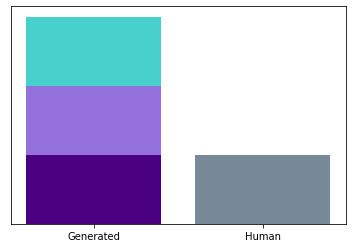

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the first bar
bar1_data = [1,1,0,1]

# Data for the second bar
bar2_data = [1 - x for x in bar1_data]

# Colors for each part of the bars
colors = ['#4B0082', '#9370DB', '#778899', '#48D1CC']

# Positions for each part of the bars
positions = np.arange(len(bar1_data))

# Create the bar chart
plt.bar(0, bar1_data[0], color=colors[0], label='Bar 1')
plt.bar(0, bar1_data[1], bottom=bar1_data[0], color=colors[1])
plt.bar(0, bar1_data[2], bottom=bar1_data[0] + bar1_data[1], color=colors[2])
plt.bar(0, bar1_data[3], bottom=bar1_data[0] + bar1_data[1] + bar1_data[2], color=colors[3])

plt.bar(1, bar2_data[0], color=colors[0], label='Bar 2')
plt.bar(1, bar2_data[1], bottom=bar2_data[0], color=colors[1])
plt.bar(1, bar2_data[2], bottom=bar2_data[0] + bar2_data[1], color=colors[2])
plt.bar(1, bar2_data[3], bottom=bar2_data[0] + bar2_data[1] + bar2_data[2], color=colors[3])

# Add labels and legend
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks([0, 1], ['Generated', 'Human'])

# Remove y-axis labels
plt.yticks([])

# Show the plot
plt.show()
